In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [13,5]

In [3]:
margins = range(0, 25000, 1000)

def evaluation(clf, margin = 5000):
    def _eval(m):
        y_hat = clf.predict(X_test)
        answer_within_range = (y_test+m > y_hat) & (y_hat > y_test-m)
        return(sum(answer_within_range) / len(answer_within_range))
    
    if type(margin) in [list, range]:
        return([_eval(m) for m in margin])
    else:
        return(_eval(margin))

In [4]:
# ---------------------------------------------------------------
# Load Data
# ---------------------------------------------------------------
input_dir = "./data/"

train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

X = train.iloc[:,:-1]
y = train.iloc[:,-1]


# ---------------------------------------------------------------
# Map features
# ---------------------------------------------------------------
# Map categorical variables with one-hot encoding
X_transformed = pd.get_dummies(X)
print(X_transformed.shape)

# Drop NAs (because regression tree can't handle NAs)
X_transformed.dropna(axis=1, how='any', inplace=True)
print(X_transformed.shape)


# ---------------------------------------------------------------
# Split to train and test set
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

print("feature:", X_train.shape[1])
print("num train samples:", X_train.shape[0])
print("num valid samples:", X_test.shape[0])

(1460, 289)
(1460, 286)
feature: 286
num train samples: 1168
num valid samples: 292


In [Don't use deep learning your data isn't that big (SimplyStats)](https://simplystatistics.org/2017/05/31/deeplearning-vs-leekasso/), 

> When your dataset isn’t that big, doing something simpler is often both more interpretable and it works just as well due to potential overfitting.

> For low training set sample sizes it looks like the simpler method (just picking the top 10 and using a linear model) slightly outperforms the more complicated methods. As the sample size increases, we see the more complicated method catch up and have comparable test set accuracy.


## What if I use deep learning?

In [5]:
from sklearn.neural_network import MLPRegressor

In [6]:
# Params
alphas = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
max_iters = [25, 50, 100, 200, 500, 1000, 1500]
activations = ['identity', 'logistic', 'tanh', 'relu']
solvers = ['lbfgs', 'sgd', 'adam']

clfs_all = {}

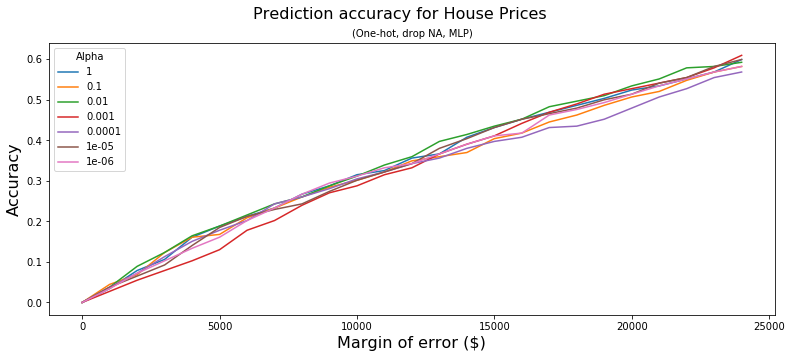

In [7]:
param_name = "Alpha"
params = alphas

clfs = {}
for i in params:
    mlp = MLPRegressor(
        solver='lbfgs',
        alpha=i, # vary this
        random_state=1)
    mlp = mlp.fit(X_train, y_train)
    clfs[i] = mlp

for k in clfs.keys():
    label = k
    plt.plot(margins, evaluation(clfs[k], margins), label=label)

plt.legend(loc='upper left', title=param_name)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Margin of error ($)', fontsize=16)
plt.suptitle('Prediction accuracy for House Prices', fontsize=16)
plt.title('(One-hot, drop NA, MLP)', fontsize=10)

clfs_all[param_name] = clfs

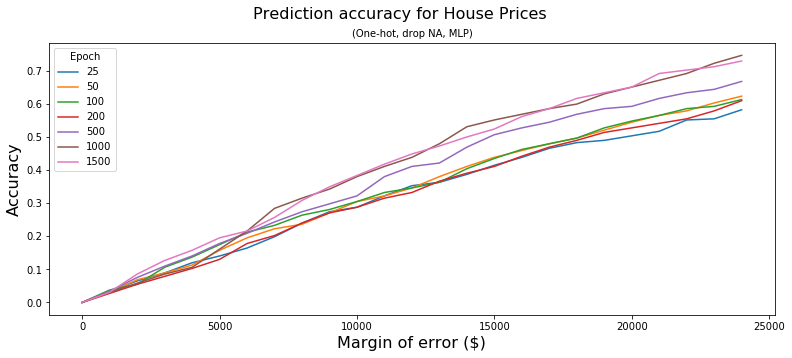

In [8]:
param_name = "Epoch"
params = max_iters

clfs = {}
for i in params:
    mlp = MLPRegressor(
        solver='lbfgs',
        alpha=0.001,
        max_iter=i, # vary this
        random_state=1)
    mlp = mlp.fit(X_train, y_train)
    clfs[i] = mlp

for k in clfs.keys():
    label = k
    plt.plot(margins, evaluation(clfs[k], margins), label=label)

plt.legend(loc='upper left', title=param_name)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Margin of error ($)', fontsize=16)
plt.suptitle('Prediction accuracy for House Prices', fontsize=16)
plt.title('(One-hot, drop NA, MLP)', fontsize=10)

clfs_all[param_name] = clfs

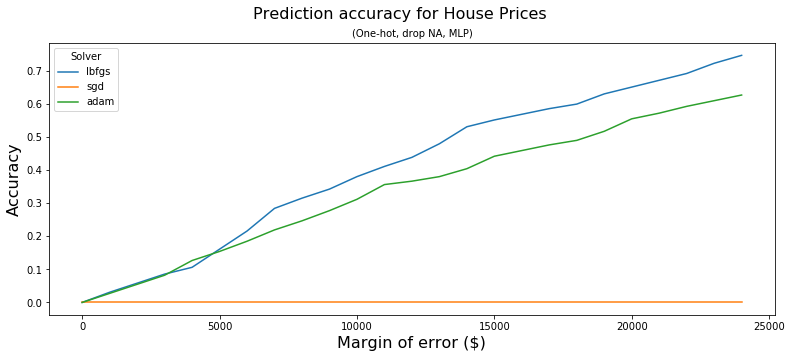

In [9]:
param_name = "Solver"
params = solvers

clfs = {}
for i in params:
    mlp = MLPRegressor(
        solver=i, # vary this
        alpha=0.001,
        max_iter=1000,
        random_state=1)
    mlp = mlp.fit(X_train, y_train)
    clfs[i] = mlp

for k in clfs.keys():
    label = k
    plt.plot(margins, evaluation(clfs[k], margins), label=label)

plt.legend(loc='upper left', title=param_name)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Margin of error ($)', fontsize=16)
plt.suptitle('Prediction accuracy for House Prices', fontsize=16)
plt.title('(One-hot, drop NA, MLP)', fontsize=10)

clfs_all[param_name] = clfs

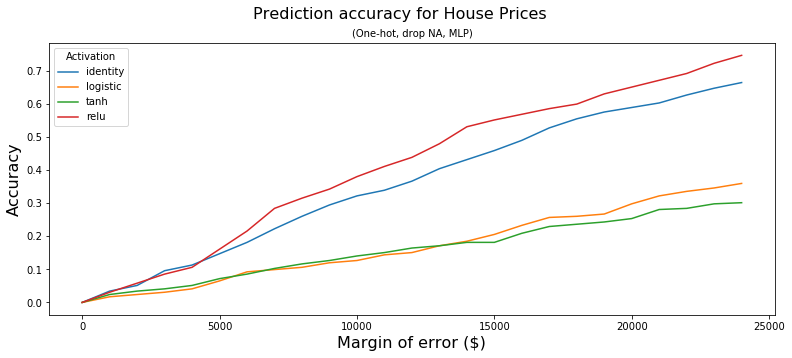

In [10]:
param_name = "Activation"
params = activations

clfs = {}
for i in params:
    mlp = MLPRegressor(
        solver='lbfgs',
        activation=i, # vary this
        alpha=0.001,
        max_iter=1000,
        random_state=1)
    mlp = mlp.fit(X_train, y_train)
    clfs[i] = mlp

for k in clfs.keys():
    label = k
    plt.plot(margins, evaluation(clfs[k], margins), label=label)

plt.legend(loc='upper left', title=param_name)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Margin of error ($)', fontsize=16)
plt.suptitle('Prediction accuracy for House Prices', fontsize=16)
plt.title('(One-hot, drop NA, MLP)', fontsize=10)

clfs_all[param_name] = clfs

## Summary graph

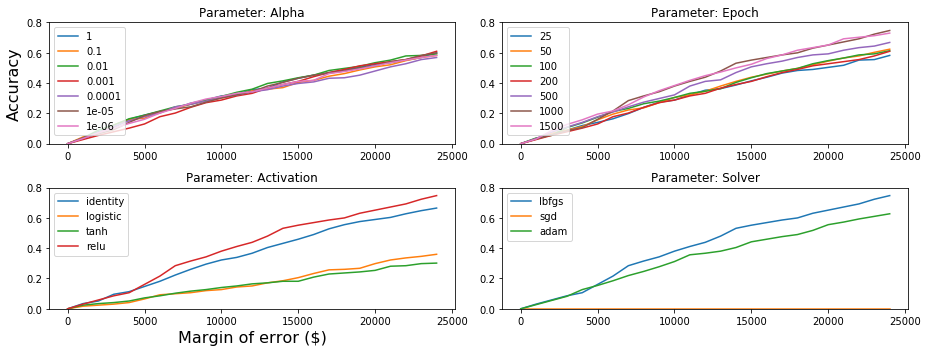

In [54]:
f, axarr = plt.subplots(2,2)

param_names = ["Alpha", "Epoch", "Activation", "Solver"]
indx_parms = 0

for i in range(2):
    for j in range(2):        
        param_name = param_names[indx_parms]
        
        for k in clfs_all[param_name].keys():
            axarr[i,j].plot(margins,
                            evaluation(clfs_all[param_name][k], margins),
                            label=k)
        axarr[i,j].legend(loc='upper left')
        axarr[i,j].set_title("Parameter: %s" % param_name)
        axarr[i,j].set_ylim([0, 0.8])
        
        indx_parms += 1

axarr[0,0].set_ylabel('Accuracy', fontsize=16)
axarr[1,0].set_xlabel('Margin of error ($)', fontsize=16)
plt.tight_layout()